In [74]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sb

In [3]:
data=pd.read_csv(r"C:\Users\S.Joshi\Desktop\Data Science\DATASETS\Loan_data.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [7]:
data['Loan_Status'].value_counts()
# This shows imbalance data set

Y    422
N    192
Name: Loan_Status, dtype: int64

# Checking for missing values

In [5]:
data.isnull().sum()/len(data)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
data['Gender'].mode()[0]

'Male'

In [9]:
# Replacing Gender column with it's 'mode'
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Gender'].isnull().any()

False

In [10]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
# Filling the Married column with the backward fill method
data['Married']=data['Married'].fillna(method='bfill')
data['Married'].isnull().any()

False

In [13]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [14]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [89]:
#Filling the Dependents column with 0 where there is NaN
data['Dependents']=data['Dependents'].fillna('0')
# data['Dependents'] = data['Dependents'].replace(0,'0')

In [90]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [20]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [22]:
data['Self_Employed'].tail()

609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, dtype: object

In [16]:
data['Self_Employed']=data['Self_Employed'].fillna('No')
data['Self_Employed'].isnull().any()

False

In [25]:
data['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [17]:
data.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [18]:
data['LoanAmount'].isnull().sum()

22

In [43]:
pd.set_option('display.max_rows', 150)
data.head(100)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [36]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [37]:
# Assuming that there is no credit history, if there is NaN. So, replacing NaN's with 0
data['Credit_History'].fillna(0,inplace=True)

In [38]:
data['Loan_Amount_Term'].isnull().sum()

14

In [50]:
data['LoanAmount'].fillna(0, inplace=True)

In [39]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [87]:
# Replacing NaN in Loan_Amount_Term with 0
data['Loan_Amount_Term'].fillna(0, inplace=True)
# data['Loan_Amount_Term'] = data['Loan_Amount_Term'].replace('0',0)

In [91]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,   0., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [51]:
data.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [52]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [152]:
x = data.drop(['Loan_ID','Loan_Status'], axis=1)
y = data['Loan_Status']

In [70]:
for i in x.columns:
    if x[i].dtype == type(object):
        print(x[i].nunique())
        print(x[i].unique())
        print()
        print('-'*50)
        

2
['Male' 'Female']

--------------------------------------------------
2
['No' 'Yes']

--------------------------------------------------
5
['0' '1' '2' '3+' 0]

--------------------------------------------------
2
['Graduate' 'Not Graduate']

--------------------------------------------------
2
['No' 'Yes']

--------------------------------------------------
3
['Urban' 'Rural' 'Semiurban']

--------------------------------------------------


# EDA

In [72]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,141.166124,334.201954,0.773616
std,6109.041673,2926.248369,88.340630,82.183884,0.418832
min,150.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Visualizing the data

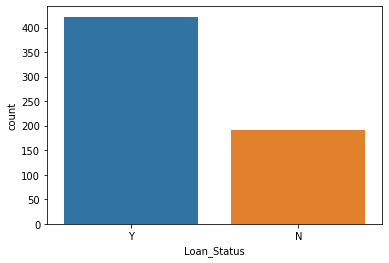

In [107]:
sb.countplot(data['Loan_Status'])
# This shows that this an imbalanced dataset

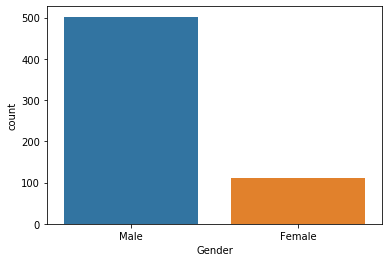

In [106]:
sb.countplot(data['Gender'])
# More number of males has applied for the loan

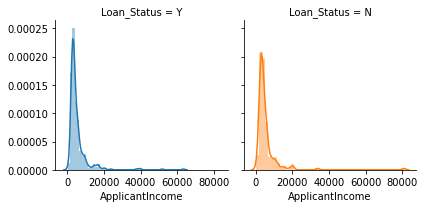

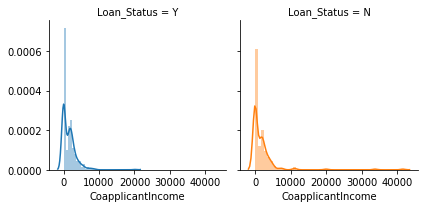

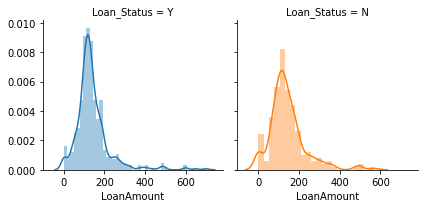

In [112]:
fg = sb.FacetGrid(data, col='Loan_Status', hue = 'Loan_Status')
fg.map(sb.distplot, 'ApplicantIncome')

fg = sb.FacetGrid(data, col='Loan_Status', hue = 'Loan_Status')
fg.map(sb.distplot, 'CoapplicantIncome')

fg = sb.FacetGrid(data, col='Loan_Status', hue = 'Loan_Status')
fg.map(sb.distplot, 'LoanAmount')

In [114]:
tab3 = pd.crosstab(index = data['Credit_History'], columns = data['Loan_Status'])
tab3

Loan_Status,N,Y
Credit_History,,
0.0,95,44
1.0,97,378


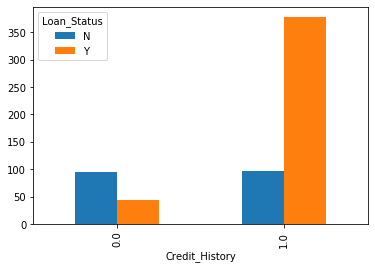

In [116]:
tab3.plot(kind='bar')
# This shows that persons who have already taken crdit before has higher chances of getting loan

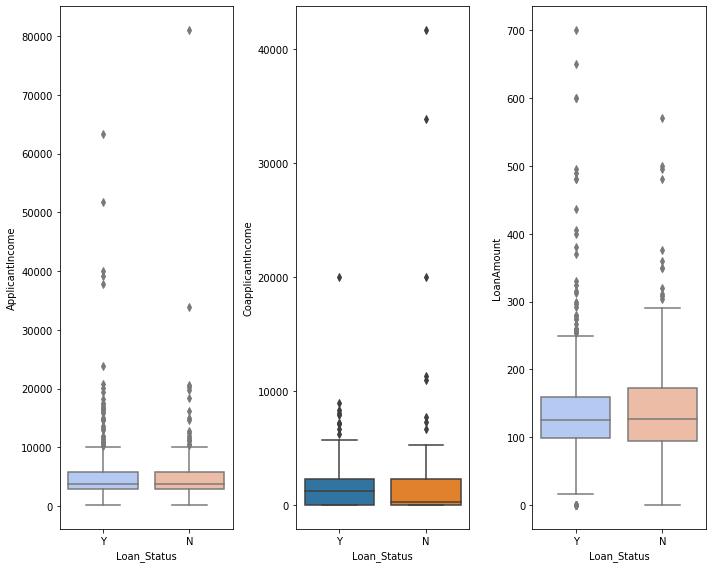

In [133]:
plt.rcParams['figure.figsize']=(10,8)
f, (ax1,ax2,ax3) = plt.subplots(1,3)
sb.boxplot('Loan_Status', 'ApplicantIncome', data=data, ax=ax1, palette = 'coolwarm')
sb.boxplot('Loan_Status', 'CoapplicantIncome', data=data, ax=ax2)
sb.boxplot('Loan_Status', 'LoanAmount', data=data, ax=ax3, palette = 'coolwarm')
f.tight_layout()

### Checking for outliers

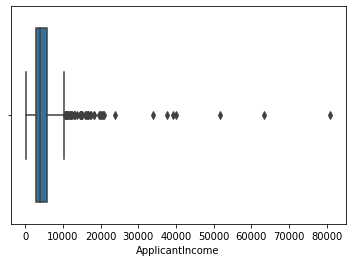

In [77]:
sb.boxplot(data['ApplicantIncome'])
# Not removing the outliers as there are many. This shows that these outliers may add value to the data
# For example, a person with higher ApplicantIncome may take the loan for shorter period of time or his/her loan amount 
# can be higher as higher income can help him/her to repay it back.
# Similarly, there can be many such understandings due to which outliers are not removed when there are more of these.

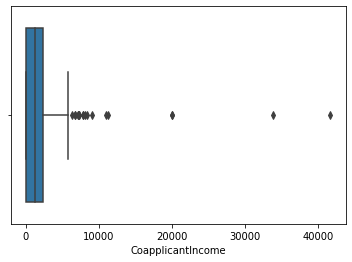

In [79]:
sb.boxplot(data['CoapplicantIncome'])
# Similar is the case with co applicant income, different income range for co applicant is also necessary to 
# consider as if an applicant fails to repay an installment on time so co applicant can help to repay
# SO here also not removing the outliers.

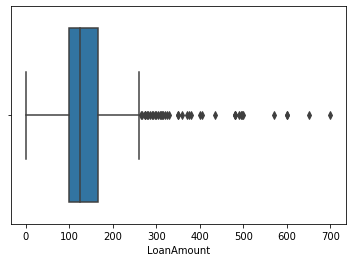

In [81]:
sb.boxplot(data['LoanAmount'])
# In case of Loan Amount it's obvious that there will be many outliers as different persons are taking loan of different
# amounts depending on their family and income background

### Checking the relations between the variables

- Checking if number of dependents depends on the loan status
- Since both are categorical variable, using Chi- Square test
- Null Hypotheses: Dependents and Loan_status may be independent
- Alternate Hypotheses: Dependents and Loan_status may not be independent

In [92]:
tab1 = pd.crosstab(index = data['Dependents'], columns = data['Loan_Status'])
tab1

Loan_Status,N,Y
Dependents,,
0,113,247
1,36,66
2,25,76
3+,18,33


In [94]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)
# argument for chi square test is the contingency table
# Now p value is greater than 0.01 (1% level of significance) and at 0.05(5% level of significance), so null hypotheses is
# accepted

(3.1513990012324227,
 0.3688663081366005,
 3,
 array([[112.5732899 , 247.4267101 ],
        [ 31.89576547,  70.10423453],
        [ 31.58306189,  69.41693811],
        [ 15.94788274,  35.05211726]]))

- Comparing different property area with Loan_Status
- Whether loan status depends from where the person belongs, ie, a person may or may not get a loan if he/she is from rural or urban or semi urban places
- Applying Chi-Square test 
- Null Hypotheses: Property area and Loan Status may be independent
- Alternate Hypotheses: Property area and Loan Status may not be independent

In [97]:
tab2 = pd.crosstab(index = data['Property_Area'], columns = data['Loan_Status'])
tab2

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [98]:
chi2_contingency(tab2)
# Here, p value is less than 0.01(1% Level of Significance), so this means that getting approval for loan doesnt 
# depends from which area a person belongs
# example: if a person belongs to urban area then he/she might not get the loan and another person living in rural area
# might get the loan, so it's not like living in urban area increases the chances of getting the loan, or, living
# in rural area leads to less chances of getting loan.

(12.297623130485675,
 0.0021360187811644937,
 2,
 array([[ 55.97394137, 123.02605863],
        [ 72.85993485, 160.14006515],
        [ 63.16612378, 138.83387622]]))

- Checking if Gender affects the Loan Status
- Null Hypotheses: Gender and Loan_Status may be independent
- Alternate Hypotheses: Gender and Loan_Status may not be independent

In [220]:
tab3 = pd.crosstab(index=data['Gender'], columns=data['Loan_Status'])
tab3

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


In [221]:
chi2_contingency(tab3)
# P value is greater than the 0.01(1% Level of Siginificance) and 0.05(5% Level of Significance)
# This shows that it is not specific that if a person is male or female he or she will get the loan or vice versa

(0.11087854691241235, 0.7391461310869638, 1, array([[ 35.0228013,  76.9771987],
        [156.9771987, 345.0228013]]))

- Checking for relation between Applicant Income and Loan Status
- Using one way ANOVA as there is one categorical and one numerical variable
- Group 1: All applicant income for Loan Status = Y
- Group 2: All applicant income for Loan Status = N
- Null Hypotheses: Mean of Group 1 and Group 2 may be equal
- Alternate Hypotheses: Mean of Group 1 and Group 2 may not be equal

In [95]:
data["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [96]:
from scipy.stats import f_oneway
f_oneway(data[data['Loan_Status']=='Y']['ApplicantIncome'], data[data['Loan_Status']=="N"]['ApplicantIncome'])
# This shows that Loan_Status and Applicant Income are not directly related
# For example: if a person has high income then it is not necessary that his/her loan can be accepted, it can 
# be rejected also
# Similarly, if a person is having lower income then it is not always necessary that he/she will not get the loan 
# approval, they may get the approval of loan

F_onewayResult(statistic=0.013574218522301743, pvalue=0.907287812130378)

In [99]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Data Preprocessing

In [135]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [146]:
cols = x.columns
cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [156]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    if x[col].dtype == type(object):
        x[col] = le.fit_transform(x[col])
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,0.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [166]:
y = le.fit_transform(y)
y = pd.DataFrame(y)

In [167]:
type(y)

pandas.core.frame.DataFrame

### Balancing the dataset

In [169]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
x_res, y_res = sm.fit_resample(x, y)

C:\Users\S.Joshi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\S.Joshi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [172]:
x_bal = pd.DataFrame(x_res, columns = x.columns)
y_bal = pd.DataFrame(y_res, columns = ['Loan_Status'])

In [173]:
x_bal.shape

(844, 11)

In [174]:
data.shape

(614, 13)

In [176]:
y_bal.shape

(844, 1)

In [178]:
y_bal['Loan_Status'].value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

## Standardizing the balanced data

In [181]:
x_bal.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,0.0,360.0,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0


- Applying MinMax Scaler to scale down the data in the range of 0 and 1

In [183]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_bal['ApplicantIncome'] = mms.fit_transform(x_bal[['ApplicantIncome']])

In [185]:
x_bal['CoapplicantIncome'] = mms.fit_transform(x_bal[['CoapplicantIncome']])
x_bal['LoanAmount'] = mms.fit_transform(x_bal[['LoanAmount']])
x_bal['Loan_Amount_Term'] = mms.fit_transform(x_bal[['Loan_Amount_Term']])
x_bal.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,0.070489,0.000000,0.000000,0.75,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,0.054830,0.036192,0.182857,0.75,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.035250,0.000000,0.094286,0.75,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,0.030093,0.056592,0.171429,0.75,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,0.072356,0.000000,0.201429,0.75,1.0,2.0


# BUILDING ML MODEL

In [258]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle

def fit_model(x,y, algo, classifier, param, cv):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    
    gs = GridSearchCV(classifier, param, cv=cv, scoring='accuracy', n_jobs=-1)
    model = gs.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    best_param = model.best_params_
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    pickle.dump(model,open(algo,'wb'))
    
    print("Best Parameters:", best_param)
    print("Classification Report:", classification_report(y_test,y_pred))
    print("Accuracy Score:", acc)
    print("Confusion Matrix:", cm)

## Applying Support Vector Machine: Used for Binary Target only

In [195]:
from time import time

In [194]:
from sklearn.svm import SVC
svm=SVC()
params = {'C':[0.1, 1, 100, 1000], 'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]}
fit_model(x_bal, y_bal, 'SVM', svm, params, 5)

Best Parameters: {'C': 100, 'gamma': 0.1}
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.66      0.75        86
           1       0.72      0.88      0.79        83

    accuracy                           0.77       169
   macro avg       0.78      0.77      0.77       169
weighted avg       0.78      0.77      0.77       169

Accuracy Score: 0.7692307692307693
Confusion Matrix: [[57 29]
 [10 73]]


C:\Users\S.Joshi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Applying Random Forest

In [231]:
from sklearn.ensemble import RandomForestClassifier
start = time()
rf = RandomForestClassifier()
params = {'n_estimators': [110, 150, 400], 'criterion': ['gini','entropy'], 'max_depth':[4,8,12,16]}
fit_model(x_bal, y_bal, 'RandomForest', rf, params, cv=7)
end=time()
print("Time Taken:", (end-start))

C:\Users\S.Joshi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Parameters: {'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 110}
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.76      0.81        86
           1       0.78      0.88      0.82        83

    accuracy                           0.82       169
   macro avg       0.82      0.82      0.82       169
weighted avg       0.82      0.82      0.82       169

Accuracy Score: 0.8165680473372781
Confusion Matrix: [[65 21]
 [10 73]]
Time Taken: 33.54074001312256


## Feature Selection

### As Random Forest is giving better accuracy so taking Random Forest 

In [233]:
rf= RandomForestClassifier(n_estimators=110, criterion = 'entropy', max_depth = 12)
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.2, random_state=0)
rf_model = rf.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
acc

C:\Users\S.Joshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8106508875739645

In [234]:
imp = rf.feature_importances_
imp

array([0.03254567, 0.06252147, 0.06137292, 0.04766819, 0.02202862,
       0.16452907, 0.1075734 , 0.14968686, 0.04031227, 0.23652167,
       0.07523987])

In [242]:
indices = np.argsort(imp)
indices = indices[::-1]
indices
# This is giving the index in descending order for the feature_importance_ values
# For ex: at 9th index the value obtained from feature_importance is highese, ie, this is the most important feature.
# Similarly, there are indices which show the descending order of features

array([ 9,  5,  7,  6, 10,  1,  2,  3,  8,  0,  4], dtype=int64)

In [239]:
cols = x_bal.columns
cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [249]:
# printing the feature importance values for each features
# printing feature name with its importance value
print("Feature Ranking: \n")
c = []
val = []
for i in range(len(cols)-1):
    c.append(cols[indices[i]])
    val.append(imp[indices[i]])
    print( cols[indices[i]],':', imp[indices[i]])

Feature Ranking: 

Credit_History : 0.23652167065273555
ApplicantIncome : 0.16452906986621657
LoanAmount : 0.1496868553997123
CoapplicantIncome : 0.10757339736075276
Property_Area : 0.0752398748051536
Married : 0.06252146588325774
Dependents : 0.06137291718642122
Education : 0.047668191198773614
Loan_Amount_Term : 0.0403122695953352
Gender : 0.03254567112128811


### Plotting the feature importance values for better visualization

In [250]:
val

[0.23652167065273555,
 0.16452906986621657,
 0.1496868553997123,
 0.10757339736075276,
 0.0752398748051536,
 0.06252146588325774,
 0.06137291718642122,
 0.047668191198773614,
 0.0403122695953352,
 0.03254567112128811]

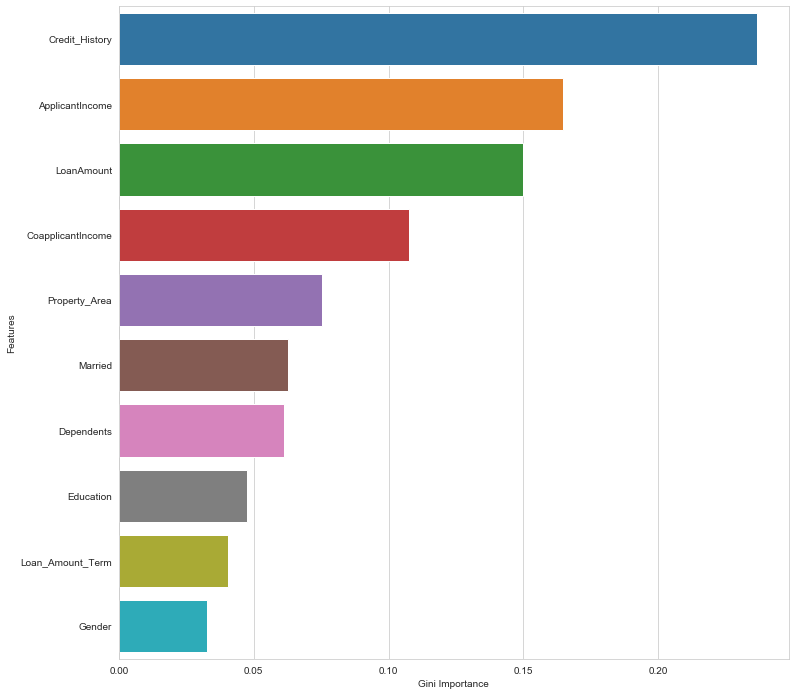

In [251]:
feat_imp = pd.DataFrame({'Features': c, 'Gini Importance':val})
plt.figure(figsize=(12,12))
sb.set_style(style = 'whitegrid')
ax = sb.barplot(feat_imp['Gini Importance'], feat_imp['Features'])
ax.set(xlabel='Gini Importance')
plt.show()

### Now passing only top 5 features to the random forest model and checking if there is any change in the accuracy

In [252]:
start = time()
rf = RandomForestClassifier()
params = {'n_estimators': [110, 150, 400], 'criterion': ['gini','entropy'], 'max_depth':[4,8,12,16]}
fit_model(x_bal.drop(['Married','Dependents','Education','Loan_Amount_Term','Gender'],axis=1), y_bal, 'RF1', rf,params, cv=7)
end=time()
print("Time Taken:", (end-start))

C:\Users\S.Joshi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Parameters: {'criterion': 'gini', 'max_depth': 16, 'n_estimators': 400}
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.76      0.78        86
           1       0.76      0.81      0.78        83

    accuracy                           0.78       169
   macro avg       0.78      0.78      0.78       169
weighted avg       0.78      0.78      0.78       169

Accuracy Score: 0.7810650887573964
Confusion Matrix: [[65 21]
 [16 67]]
Time Taken: 65.49128413200378


- The accuracy is reduced

In [253]:
# Not removing Loan Amount Term
start = time()
rf = RandomForestClassifier()
params = {'n_estimators': [110, 150, 400], 'criterion': ['gini','entropy'], 'max_depth':[4,8,12,16]}
fit_model(x_bal.drop(['Married','Dependents','Education','Gender'],axis=1), y_bal, 'RF1', rf,params, cv=7)
end=time()
print("Time Taken:", (end-start))

C:\Users\S.Joshi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Parameters: {'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 110}
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.73      0.76        86
           1       0.74      0.81      0.77        83

    accuracy                           0.77       169
   macro avg       0.77      0.77      0.77       169
weighted avg       0.77      0.77      0.77       169

Accuracy Score: 0.7692307692307693
Confusion Matrix: [[63 23]
 [16 67]]
Time Taken: 38.50463581085205


In [254]:
# Not removing Dependents
start = time()
rf = RandomForestClassifier()
params = {'n_estimators': [110, 150, 400], 'criterion': ['gini','entropy'], 'max_depth':[4,8,12,16]}
fit_model(x_bal.drop(['Married','Education','Gender'],axis=1), y_bal, 'RF1', rf,params, cv=7)
end=time()
print("Time Taken:", (end-start))

C:\Users\S.Joshi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Parameters: {'criterion': 'gini', 'max_depth': 16, 'n_estimators': 400}
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.76      0.79        86
           1       0.77      0.83      0.80        83

    accuracy                           0.79       169
   macro avg       0.79      0.79      0.79       169
weighted avg       0.80      0.79      0.79       169

Accuracy Score: 0.7928994082840237
Confusion Matrix: [[65 21]
 [14 69]]
Time Taken: 40.35743808746338


In [259]:
start = time()
rf = RandomForestClassifier()
params = {'n_estimators': [110, 150, 400], 'criterion': ['gini','entropy'], 'max_depth':[4,8,12,16]}
fit_model(x_bal.drop(['Married','Gender'],axis=1), y_bal, 'RF1', rf,params, cv=7)
end=time()
print("Time Taken:", (end-start))

C:\Users\S.Joshi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Parameters: {'criterion': 'gini', 'max_depth': 12, 'n_estimators': 110}
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.78      0.81        86
           1       0.79      0.86      0.82        83

    accuracy                           0.82       169
   macro avg       0.82      0.82      0.82       169
weighted avg       0.82      0.82      0.82       169

Accuracy Score: 0.8165680473372781
Confusion Matrix: [[67 19]
 [12 71]]
Time Taken: 35.648014545440674


In [257]:
start = time()
rf = RandomForestClassifier()
params = {'n_estimators': [110, 150, 400], 'criterion': ['gini','entropy'], 'max_depth':[4,8,12,16]}
fit_model(x_bal.drop(['Married','Loan_Amount_Term','Gender'],axis=1), y_bal, 'RF1', rf,params, cv=7)
end=time()
print("Time Taken:", (end-start))

C:\Users\S.Joshi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Parameters: {'criterion': 'gini', 'max_depth': 16, 'n_estimators': 400}
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.74      0.79        86
           1       0.76      0.84      0.80        83

    accuracy                           0.79       169
   macro avg       0.80      0.79      0.79       169
weighted avg       0.80      0.79      0.79       169

Accuracy Score: 0.7928994082840237
Confusion Matrix: [[64 22]
 [13 70]]
Time Taken: 36.72931170463562


- Now it can be seen that the accuracy is reduced as we are removing more features
- By removing only Gender and Married features, we are getting the same accuracy(done in the 1 cell above than the previous cell).

## Applying XGBoost

In [227]:
from xgboost import XGBClassifier
start = time()
xgb = XGBClassifier()
params = {'n_estimators': [150, 200, 400, 500],'max_depth':[4,8,12,16,20]}
fit_model(x_bal, y_bal, 'XGBoost', xgb, params, cv=5)
end=time()
print("Time Taken:", (end-start))

C:\Users\S.Joshi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\S.Joshi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best Parameters: {'max_depth': 12, 'n_estimators': 400}
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.76      0.79        86
           1       0.77      0.83      0.80        83

    accuracy                           0.79       169
   macro avg       0.79      0.79      0.79       169
weighted avg       0.80      0.79      0.79       169

Accuracy Score: 0.7928994082840237
Confusion Matrix: [[65 21]
 [14 69]]
Time Taken: 18.527509927749634


## Reloading the final model saved

In [262]:
model = pickle.load(open("RF1",'rb'))
model

GridSearchCV(cv=7, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 12, 16],
                         'n_estimators': [110, 150, 400]},
             scoring='accuracy')

In [264]:
x_bal.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

- This model is trained on the data having columns: Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area

In [277]:
x_bal.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,0.070489,0.000000,0.000000,0.75,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,0.054830,0.036192,0.182857,0.75,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.035250,0.000000,0.094286,0.75,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,0.030093,0.056592,0.171429,0.75,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,0.072356,0.000000,0.201429,0.75,1.0,2.0


In [272]:
model.predict([[0,0,0,0.030303,0.083999,0.164286,0.75, 1, 2]])
# Numerical values are given in the normalised form 
# Categorical values are also given in the numerical form
# But at the time of deployment we need to change all the input numerical variables to normalised using MinMax Scaler as
# used in building the model.
# Similarly all the categorical variables are label encoded when input is taken from the user

array([1], dtype=int64)